In [47]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

path_data = os.path.join(".", "ML_Lab07_Dataset.csv")

import builtins

def print(*args, **kwargs):
    kwargs['sep'] = ''
    return builtins.print(*args, **kwargs)
    
plt.rcParams['figure.figsize'] = (6, 4)
# Change to stix
plt.rcParams['font.family'] = 'STIXGeneral'

### Lab Task 1

In [48]:
"""
You have been provided with a dataset containing several feature columns. You will need to select any 3 of the feature columns to make your own dataset. The “Sale Price” is the label column that your model will predict. The dataset examples are to be divided into 2 separate portions: training and test datasets (choose from 80-20 to 70-30 ratios). Save the prepared datasets as CSV files. Next, load the datasets into your python program and store them as NumPy arrays (Xtrain , ytrain, Xtest, ytest,). Next, use feature scaling to rescale the feature columns of both datasets so that their values range from 0 to 1. Finally, print both of the datasets (you need to show any 5 rows of the datasets).
"""

# Load the dataset into your python program as NumPy arrays (Xtrain ,ytrain).
dataset = pd.read_csv(path_data)
features = ["BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF"]
label = "SalePrice"

X = dataset[features].values
y = dataset[label].values

def feature_scaling(X, axis=0):
    return (X - X.min(axis=axis)) / (X.max(axis=axis) - X.min(axis=axis))

# Split the dataset into training and test datasets
def random_split(X, y, ratio=0.8, scaling=feature_scaling):
    m = len(X)
    X = np.random.permutation(X)
    split = int(m * ratio)
    return feature_scaling(X[:split]), feature_scaling(y[:split]), feature_scaling(X[split:]), feature_scaling(y[split:])


X_train, y_train, X_test, y_test = random_split(X, y)

print("X train:")
print(X_train[:5])
print("\nX test:")
print(X_test[:5])

X train:
[[0.         0.25684932 0.1871491 ]
 [0.22433628 0.03467466 0.18340611]
 [0.09734513 0.30308219 0.28945727]
 [0.20088496 0.13441781 0.23955084]
 [0.24469027 0.29880137 0.39020586]]

X test:
[[0.         0.45308817 0.15728314]
 [0.         0.43187176 0.14991817]
 [0.         0.40735502 0.14140753]
 [0.19666903 0.34606318 0.30180033]
 [0.13235294 0.08910891 0.15319149]]


### Lab Task 2

In [54]:
"""
For linear regression, you will implement the following hypothesis:

h(x) = b + w1x1 + w2x2 + w3x3 + ...

The wj and b represent the weights while the xj represents the jth feature. The linear hypothesis h(x) is to be calculated for each training example and its difference with the label y of that training example will represent the loss. In this task, you will write a cost function that calculates the overall loss across a set of examples. This cost function will be useful to calculate the losses in both the training and test phases of the program.

cost_function(X, y, lambd)

The X and y are the features and labels of either the training or the test datasets. This is useful as it can be used for either the training examples or the test examples of the dataset. The lambd is the regularization parameter (Note that lambda is a keyword reserved in python).  The function will calculate the losses to return the overall cost value. The cost function can be references from the document provided.

The m is the number of the examples in the dataset and n is the total number of features (or non-bias weights) in the hypothesis. Write the code for the cost function and implement it for your training and test datasets to print out the cost. Provide the code and all relevant screenshots of the final output.
"""

def hypothesis(X, w, b):
    return b + np.dot(X, w)

def cost_function(X, y, w, b, lambda_):
    assert len(X) == len(y), "X and y must have the same length"

    m = len(X)
    n = X.shape[1]
    J = 1 / (2 * m) * np.sum((hypothesis(X, w, b) - y) ** 2) + 1 / n * (
        lambda_
    ) * np.sum(w**2)

    return J

# Initialize the weights and bias to random values between 0 and 1.
w = np.random.rand(3)
b = np.random.rand(1)
lambda_ = 0.2

# Verify the cost function
print("Random weights [w]: ", w)
print("Random bias [b]: ", b)
print("\nCost: ", cost_function(X_train, y_train, w, b, lambda_))

Random weights [w]: [0.16461539 0.73961744 0.57061239]
Random bias [b]: [0.18129251]

Cost: 0.15431948472050713


### Lab Task 3

In [50]:
"""
In this task, you will write a function that uses gradient descent to update the weight parameters:

gradient_descent(X, y, alpha, lambd)

The alpha is the learning rate (hyperparameter 1) and lambd is the regularization parameter (hyperparameter 2). The gradient descent algorithm is given in the manual.

Provide the code and all relevant screenshots of the final output.
"""


def gradient_descent(X, y, w, b, alpha, lambda_):
    m = len(X)
    w = w - (
        alpha * (1 / m) * np.dot(X.T, (hypothesis(X, w, b) - y))
        + (1 / m) * (lambda_ * w)
    )
    b = b - alpha * (1 / m) * np.sum(hypothesis(X, w, b) - y)

    return w, b

# Initialize the weights and bias to random values between 0 and 1.
w = np.random.rand(3)
b = np.random.rand(1)
lambda_ = 0.2
alpha = 0.01

# Verify the gradient descent function
print("Gradient descent: ")
print(
    "\nUpdated weights [w]: ", gradient_descent(X_train, y_train, w, b, alpha, lambda_)[0]
)
print("Updated bias [b]: ", gradient_descent(X_train, y_train, w, b, alpha, lambda_)[1])

Gradient descent: 

Updated weights [w]: [0.48569785 0.03136804 0.68643855]
Updated bias [b]: [0.15434342]


### Lab Task 4

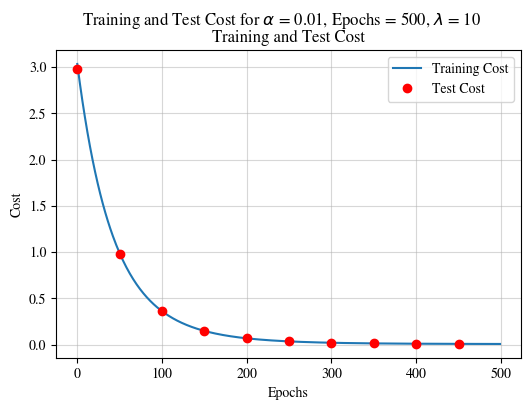

In [58]:
"""
In this task, you will use the functions from the previous two tasks to write a “main” function that performs the actual training and testing. Use the cost function and gradient descent function on the training examples to determine the training loss and update the weights respectively. Then, use the cost function on the test examples to determine the test loss. This single iteration over the entire dataset (both training and test) marks completion of one epoch. You will need to perform the training and testing over several epochs (the epoch number is another hyperparameter that must be chosen). Ensure that at the end of each epoch, the training and test losses are stored for plotting purposes. When the final epoch is performed, note down the trained parameters (weights and bias) and makes plot of the training and test losses (y-axis) over the epochs (x-axis). Ensure that both of the losses appear on the same graph. You only need to show a single plot for this task. Provide the code (excluding function definitions) and all relevant screenshots of the final output."""


def main(X_train, y_train, X_test, y_test, alpha, lambda_, epochs):
    # Initialize the weights and bias to random values between 0 and 1.
    w = np.random.rand(3)
    b = np.random.rand(1)

    # Initialize the train and test cost arrays
    train_cost = []
    test_cost = []

    for epoch in range(epochs):
        # Calculate the training and test cost
        train_cost.append(cost_function(X_train, y_train, w, b, lambda_))
        test_cost.append(cost_function(X_test, y_test, w, b, lambda_))

        # Update the weights and bias
        w, b = gradient_descent(X_train, y_train, w, b, alpha, lambda_)

    # Plot the training and test cost
    plt.suptitle(
        f"Training and Test Cost for $\\alpha$ = {alpha}, Epochs = {epochs}, $\\lambda$ = {lambda_}"
    )
    plt.plot(train_cost)
    plt.plot(test_cost, marker="o", linestyle="none", color="red", markevery=50)
    plt.title("Training and Test Cost")
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.legend(["Training Cost", "Test Cost"])
    plt.grid(alpha=0.5)
    plt.show()

main(X_train, y_train, X_test, y_test, 0.01, 10, 500)

### Lab Task 5

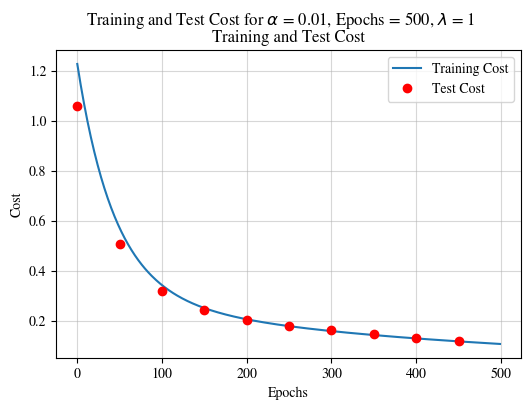

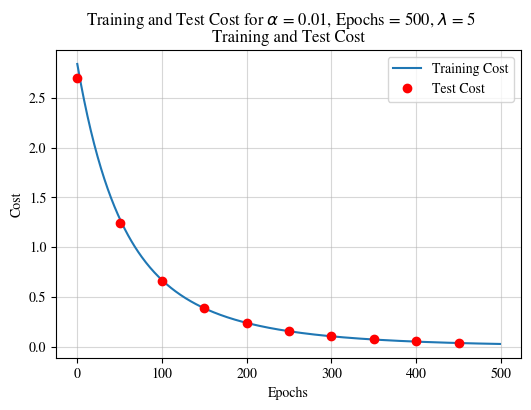

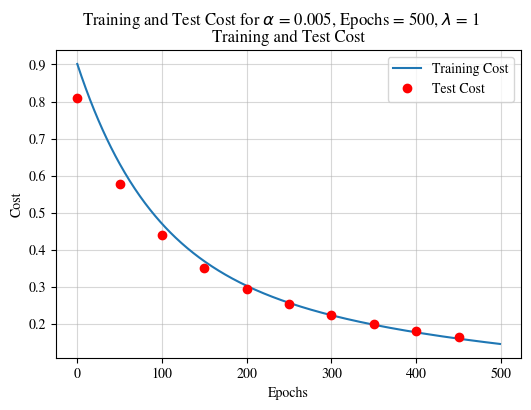

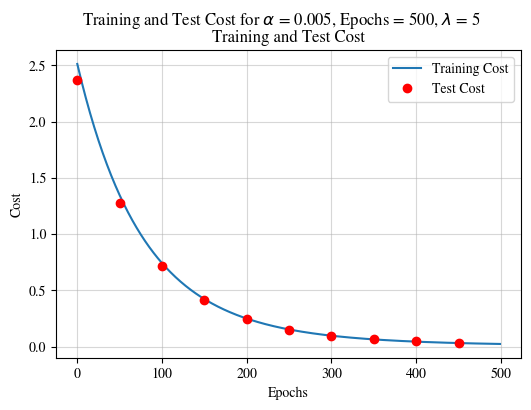

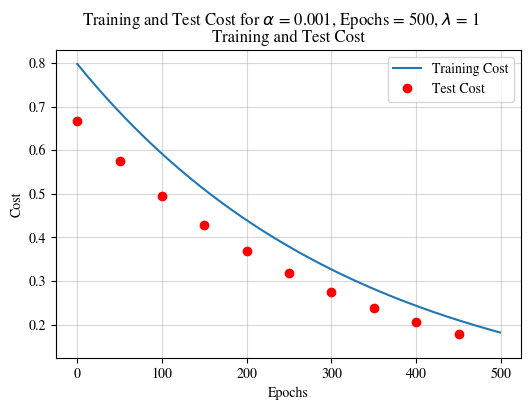

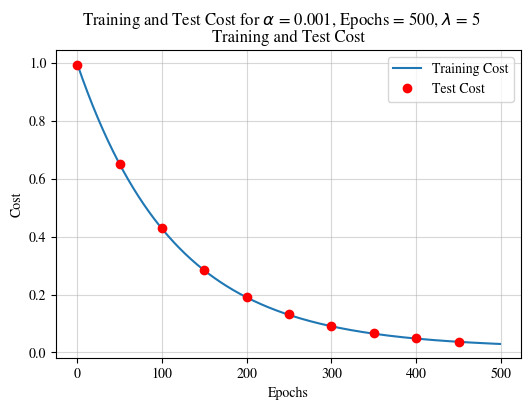

In [59]:
"""
In this task, you will use your linear regression code from the previous task. Tune the alpha and lambda hyperparameters at different values to get several plots. You need to get at least 6 plots. Mention the alpha and lambda values in the plot titles. Ensure all axes are labeled appropriately."""

alpha = [0.01, 0.005, 0.001]
lambda_ = [1, 5]

for a in alpha:
    for l in lambda_:
        main(X_train, y_train, X_test, y_test, a, l, 500)